In [1]:
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt
import pickle
#import statistics as st
ROOT.gStyle.SetOptStat(000000)

Welcome to JupyROOT 6.26/04


In [2]:
import subprocess
import sys
import matplotlib.gridspec as gridspec

#### If running on ROOT casa image some packages necessary for opening our files and plotting are not installed

def install_package(package_name):
    # Install the package using subprocess to call pip
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

def import_packages():
    try:
        import mplhep  # Replace with the module name of the package
    except ImportError:
        # print(f"{'mplhep'} not found. Installing...")
        install_package("mplhep")
        import mplhep  # Import again after installation
    try:
        import hist  # Replace with the module name of the package
    except ImportError:
        # print(f"{'hist'} not found. Installing...")
        install_package("hist")
        import hist  # Import again after installation
    try:
        import coffea  # Replace with the module name of the package
    except ImportError:
        # print(f"{'coffea'} not found. Installing...")
        install_package("coffea==0.7.22")
        import coffea  # Import again after installation
        
        
import_packages()
from TUnfold import *

0.7.22
4.3.7


In [3]:
#### open files                                                                                                                                               
#### Latest files
# fname="coffeaOutput/trijetHists_wXSscaling_QCDsim_newMBins_rapidity2.5_nominal2018.pkl"
# fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_newMBinsDR_rapidity2.5_nominal2018.pkl"
fname="coffeaOutput/trijetHists_ak4corr_QCDsim_rap2.5_nominalMG_allUncALL.pkl"
year = fname[-8:-4]
with open(fname, "rb") as f:
    result = pickle.load( f )

#### Latest files
# fname = "coffeaOutput/trijetHists_JetHT_newMBins_rapidity2.5_nominal2018.pkl"
# fname= "coffeaOutput/dijetHists_JetHT_newMBins_rapidity2.5_nominal2018.pkl"
fname="coffeaOutput/trijetHists_ak4corr_JetHT_rap2.5_nominalMG_allUncALL.pkl"
year = fname[-8:-4]
with open(fname, "rb") as f:
    result_data = pickle.load( f )
if "dijet" in fname:
    os_path = "plots/unfolding/dijet/"
else:
    os_path = "plots/unfolding/trijet/"
checkdir(os_path)
print(year)                                                                                                                                                    
# axis_names = [ax.name for ax in result['jet_pt_mass_reco_u'].axes]
axis_names = [ax.name for ax in result['ptreco_mreco_u'].axes]
print("avail hists ", result.keys())
print(axis_names)
# cats = [cat for cat in result['jet_pt_mass_reco_u'][{'ptreco':sum, 'dataset':sum, 'mreco':sum}].axes[0]]
# availSysts = [ax for ax in result['jet_pt_mass_reco_u'].project("syst").axes[0]]
cats = [cat for cat in result['ptreco_mreco_u'].project('ptreco','mreco').axes[0]]
availSysts = [ax for ax in result['ptreco_mreco_u'].project("syst").axes[0]]




cALL
avail hists  dict_keys(['misses', 'misses_g', 'fakes', 'fakes_g', 'underflow', 'underflow_g', 'weights', 'ptreco_mreco_u', 'ptreco_mreco_g', 'ptgen_mgen_u', 'ptgen_mgen_g', 'response_matrix_u', 'response_matrix_g', 'cutflow', 'jkflow', 'alljet_ptreco_mreco', 'btag_eta', 'njet_gen', 'njet_reco', 'dphimin_gen', 'dphimin_reco', 'asymm_reco', 'asymm_gen', 'sdmass_orig', 'sdmass_ak8corr', 'sdmass_ak4corr', 'jet_rap_reco', 'jet_rap_gen', 'jet_phi_gen', 'jet_phi_reco', 'jet_eta_phi', 'jet_dr_gen_subjet', 'jet_dr_reco_to_gen_subjet', 'fakes_eta_phi', 'fakes_asymm_dphi'])
['syst', 'jk', 'ptreco', 'mreco']


In [4]:
print("Available systs ", availSysts)
detectorBinning, generatorBinning, mreco_edges, ptreco_edges, mgen_edges, ptgen_edges = setupBinning(result)
#### for data get results once                                                                                                                            
DataReco_u, DataReco_g = fillData(result_data, detectorBinning, mreco_edges, ptreco_edges, new=True)
syst_hist_dict = {}
#hist = getHists(result, "nominal", detectorBinning, generatorBinning)                                                                                    
#syst_hist_dict["nominal"]=hist                                                                                                                           
#for syst in [syst for syst in availSysts if ("Up" in syst)]:    
for syst in availSysts:  
    # ROOT.TH1.SetDefaultSumw2(True)
    #syst = syst[:-2]                                                                                                                                     
    hist = getHists(result, syst, detectorBinning, generatorBinning, new=True)
    syst_hist_dict[syst]=hist
    print("Building respone matrices for systematic ", syst)
    #### check that response matrix has been filled properly                                                                                              
    MCReco_u_M=hist['MCGenRec_u'].ProjectionY("MCReco ungroomed")
    MCTruth_u_M=hist['MCGenRec_u'].ProjectionX("MCTruth ungroomed")
    #MCReco_u_M.Print("all")                                                                                                                              
    MCReco_g_M=hist['MCGenRec_g'].ProjectionY("MCReco groomed")
    MCTruth_g_M=hist['MCGenRec_g'].ProjectionX("MCTruth groomed")
    plotinputsROOT(hist['MCGenRec_u'], hist['MCTruth_u'], hist['MCReco_u'], groom="ungroomed", syst=syst, year=year, ospath=os_path)
    plotinputsROOT(hist['MCGenRec_g'], hist['MCTruth_g'], hist['MCReco_g'], groom="groomed", syst=syst, year=year, ospath=os_path)
    plotinputsROOT(hist['MCGenRec_u'], hist['MCTruth_u'], DataReco_u, groom="ungroomed", syst=syst, year=year, ospath=os_path+"data")
    plotinputsROOT(hist['MCGenRec_g'], hist['MCTruth_g'], DataReco_g, groom="groomed", syst=syst, year=year, ospath=os_path+"data")
    #### plot inputs and check that they match matrix
histDict = syst_hist_dict["nominal"]
#### ADD RATIO PLOTS FOR ALL INPUT UNCERTAINTIES
# for syst in [syst for syst in availSysts if syst != "nominal"]:
#     hist = syst_hist_dict[syst]

Available systs  ['HEM', 'jerUp', 'jerDown', 'jmrUp', 'jmrDown', 'jmsUp', 'jmsDown', 'nominal', 'PDFDown', 'PUSFUp', 'Q2Up', 'L1prefiringDown', 'PDFUp', 'Q2Down', 'PUSFDown', 'L1prefiringUp', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'RelativePtEC1Down', 'RelativePtEC2Up', 'RelativePtEC2Down', 'RelativePtHFUp', 'RelativePtHFDown', 'RelativeBalUp', 'RelativeBalDown', 'RelativeSampleUp', 'RelativeSampleDown', 'Relat

Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInput_ungroomed_HEMflatmatrixcALL.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInput_groomed_HEMflatmatrixcALL.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/dataMCInput_ungroomed_HEMflatmatrixcALL.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/dataMCInput_groomed_HEMflatmatrixcALL.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInput_ungroomed_jerUpflatmatrixcALL.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInput_groomed_jerUpflatmatrixcALL.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/dataMCInput_ungroomed_jerUpflatmatrixcALL.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/dataMCInput_groomed_jerUpflatmatrixcALL.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInpu

In [5]:
# if "dijet" in fname:
#     os_path = "plots/unfolding/dijet/"
# else:
#     os_path = "plots/unfolding/trijet/"
# CompareCoffeaROOT(result, syst_hist_dict, os_path)

In [6]:
# CompareCoffeaROOT(result, syst_hist_dict, os_path, groomed=True)

Hist(
  StrCategory(['HEM', 'jerUp', 'jerDown', 'jmrUp', 'jmrDown', 'jmsUp', 'jmsDown', 'nominal', 'PDFDown', 'PUSFUp', 'Q2Up', 'L1prefiringDown', 'PDFUp', 'Q2Down', 'PUSFDown', 'L1prefiringUp', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'RelativePtEC1Down', 'RelativePtEC2Up', 'RelativePtEC2Down', 'RelativePtHFUp', 'RelativePtHFDown', 'RelativeBalUp', 'RelativeBalDown', 'RelativeSampleUp', 'RelativeSampleDown', 'Re

AttributeError: 'dict' object has no attribute 'underflow'

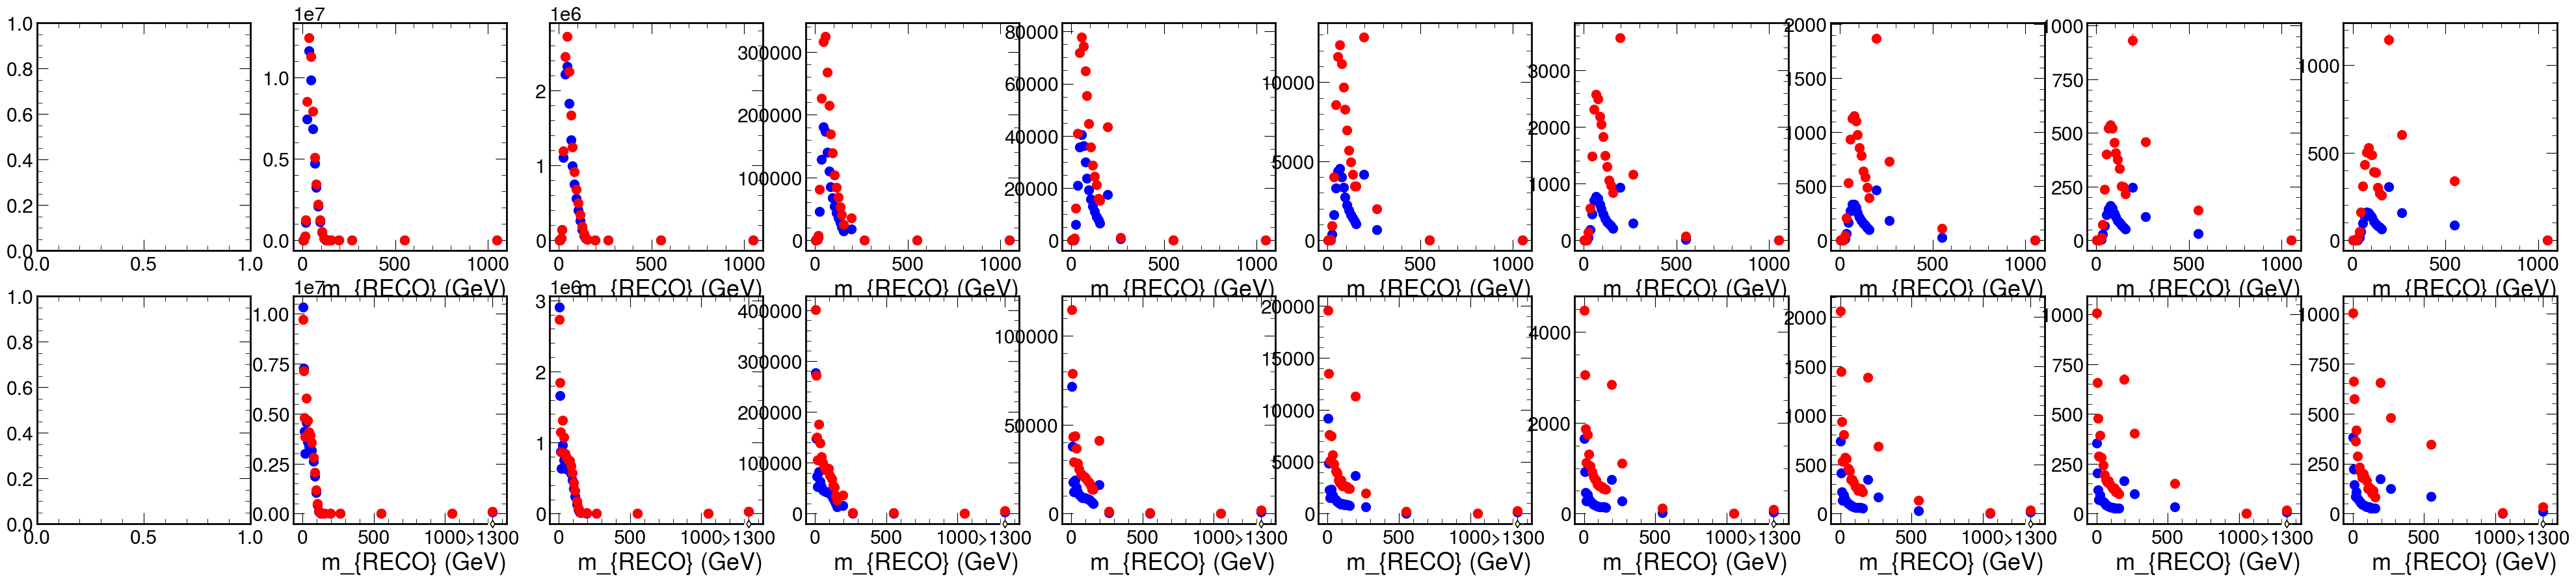

In [7]:
#### Check that in coffea mc reco and data reco match up
print(result['response_matrix_u'])
pt_bins = [bin[0] for bin in result['response_matrix_u'].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result['response_matrix_u'].project('ptreco').axes[0]]
lastbin = result['response_matrix_u'].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result['response_matrix_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)+1))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i+1]
    axm = axs.flatten()[i+2+len(pt_bins)]
    hep.histplot(result['ptreco_mreco_u'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',
                         label=['MC ug ' + str(pt_bins[i])])
    hep.histplot(result_data['ptreco_mreco_u'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red',
                         label=['Data ug ' + str(pt_bins[i])])
    hep.histplot(result['ptreco_mreco_g'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',flow='show',
                         label=['MC g ' + str(pt_bins[i])])
    hep.histplot(result_data['ptreco_mreco_g'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', flow='show',
                         label=['Data g ' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,4E7])
    # axm.set_xlim([0,1000])
    # axm.set_ylim([0,1E7])
plt.subplots_adjust(wspace=0.2, hspace=0.20)
hep.histplot(result['ptreco_mreco_g'][{'ptreco':hist.underflow, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'blue',
                         label=['MC ug pT<200GeV'])
hep.histplot(result_data['ptreco_mreco_g'][{'ptreco':hist.underflow, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'red', 
                         label=['Data ug pT<200GeV'])
hep.histplot(result['ptreco_mreco_g'][{'ptreco':hist.underflow, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'blue',
                         label=['MC g pT<200GeV'])
hep.histplot(result_data['ptreco_mreco_g'][{'ptreco':hist.underflow, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'red',
                         label=['Data g pT<200GeV'])
# axs[0,0].set_xlim([0,1000])
# axs[0,0].set_ylim([0,4E7])
# print(result_mc['response_matrix_u'][hist.underflow])
plt.subplots_adjust(wspace=0.0, hspace=0.10)
plt.savefig(os_path+"/unrolledPtGenMGen_u_"+year+".png")

In [8]:
def plotMatrixInputs(ptbin_edges, mbin_edges, hist_list, hist_obj, norm_by_bw = True):
    for ipt in range(len(ptbin_edges)-1):
        ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
        ci.cd()
        hcopy = ROOT.TH1D("inputPt" +hist_obj+ str(ipt), "Input "+hist_obj+" pT " + str(ptbin_edges[ipt]) +" - " +str(ptbin_edges[ipt+1]), len(mbin_edges)-1, mbin_edges)
        #        hcopy.Print("all") 
        canvs = []
        hists = []
        for im in range(len(mbin_edges)):
            # print("Bin value: ", hist['MCTruth_u'].GetBinContent(im+1+ipt*(len(mgen_edges)-1)), " for pt bin ", ipt, " and mass bin ", im, " ", mgen_edges[im])
            # print("Error value: ", np.sqrt(hist['MCTruth_u'].GetBinError(im+1+ipt*(len(mgen_edges)-1))), " from truth bin ", im+2+ipt*(len(mgen_edges)-1))
            if hcopy.GetBinWidth(im)>0 and norm_by_bw:
                hcopy.SetBinError(im, hist_list[hist_obj].GetBinError(im+1+ipt*(len(mbin_edges)-1))/hcopy.GetBinWidth(im))   
                hcopy.SetBinContent(im, hist_list[hist_obj].GetBinContent(im+1+ipt*(len(mbin_edges)-1))/hcopy.GetBinWidth(im))
            else:  
                hcopy.SetBinContent(im, hist_list[hist_obj].GetBinContent(im+1+ipt*(len(mbin_edges)-1)))
                hcopy.SetBinError(im, hist_list[hist_obj].GetBinError(im+1+ipt*(len(mbin_edges)-1)))     
        hcopy.SetLineColor(ROOT.kBlue)
        hcopy.SetMarkerColor(ROOT.kBlue)
        hcopy.GetXaxis().SetTitle(hist_obj+" Mass GeV")
        hcopy.GetYaxis().SetTitle("#frac{Events}{bin size} GeV^{-1}")
        hcopy.Draw()                                                                                                                           
        leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                 
        leg1.AddEntry(hcopy, hist_obj, "p")
        leg1.Draw()
        ci.Draw()                                                                                                                                        
        # ci.Close()
        #### add resp matrices and other hists to dictionary for final result                                                                             
        hists.append(hcopy)
        canvs.append(ci)

In [9]:
### Plot response matrix inputs groomed and ungroomed
syst = "nominal"
plotMatrixInputs(ptreco_edges, mreco_edges, hist, "MCReco_g")
plotMatrixInputs(ptgen_edges, mgen_edges, hist, "MCTruth_g")
plotMatrixInputs(ptreco_edges, mreco_edges, hist, "MCReco_u")
plotMatrixInputs(ptgen_edges, mgen_edges, hist, "MCTruth_u")

Number of reco pt bins  9  number of reco mass bins  22
Number of gen pt bins  9  number of gen mass bins  11
Gen mass bin  0.0  reco mass bin  0.0
Gen mass bin  0  reco mass bin  0
Bin width :  10.0
Starting bin content  10921.04479894409  after norm  1092.104479894409
Starting bin content  24321.342703680886  after norm  2432.1342703680884
Gen mass bin  10.0  reco mass bin  10.0
Gen mass bin  1  reco mass bin  2
Bin width :  10.0
Starting bin content  635139.522012487  after norm  63513.95220124871
Starting bin content  1329450.9803453118  after norm  132945.09803453117
Gen mass bin  20.0  reco mass bin  20.0
Gen mass bin  2  reco mass bin  4
Bin width :  10.0
Starting bin content  14561457.513644956  after norm  1456145.7513644956
Starting bin content  19108007.03292999  after norm  1910800.703292999
Gen mass bin  40.0  reco mass bin  40.0
Gen mass bin  3  reco mass bin  6
Bin width :  20.0
Starting bin content  21518366.497000977  after norm  1075918.3248500489
Starting bin content

Warning in <TROOT::Append>: Replacing existing TH1: inputRecoPt0 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCGenRecoInput_ungroomed_nominal_pt200.0_cALL.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: inputRecoPt1 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCGenRecoInput_ungroomed_nominal_pt260.0_cALL.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: inputRecoPt2 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCGenRecoInput_ungroomed_nominal_pt350.0_cALL.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: inputRecoPt3 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCGenRecoInput_ungroomed_nominal_pt430.0_cALL.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: inputRecoPt4 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding

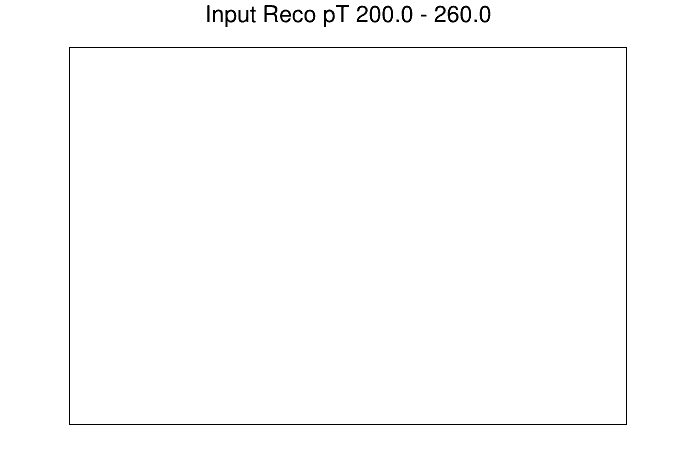

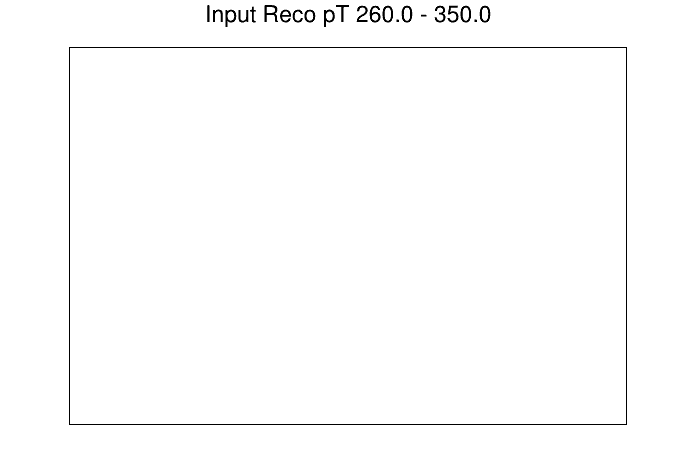

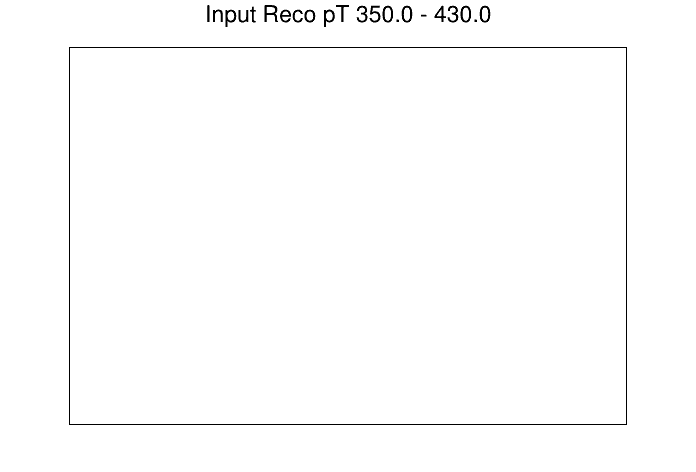

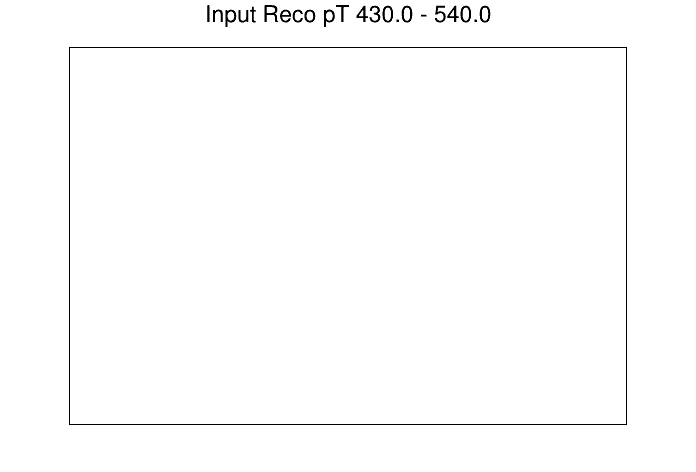

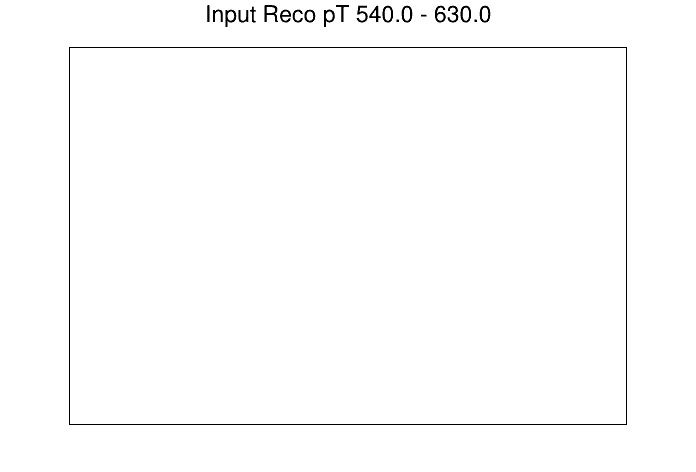

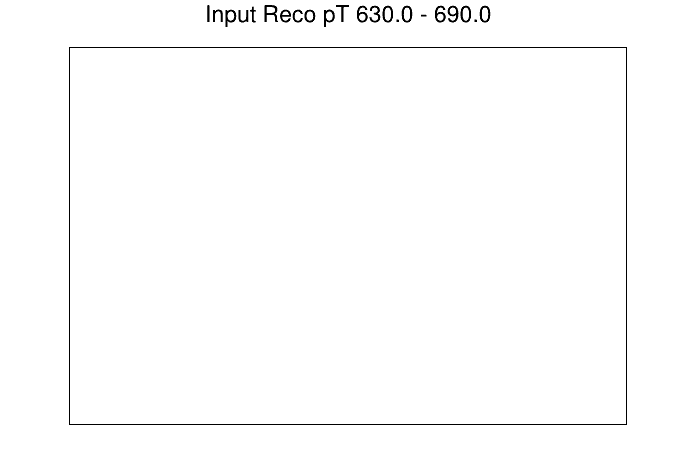

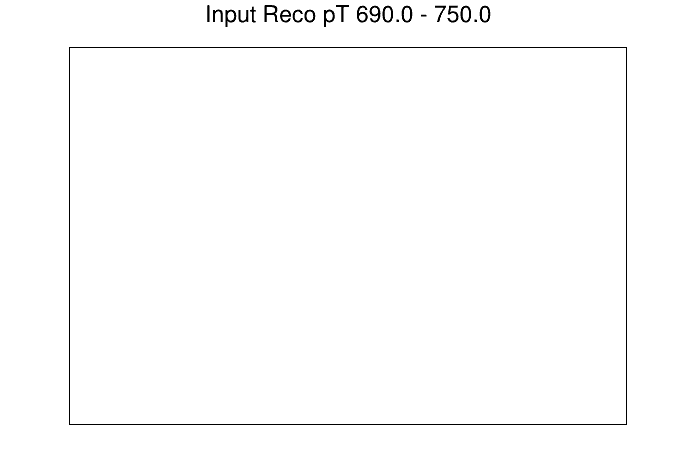

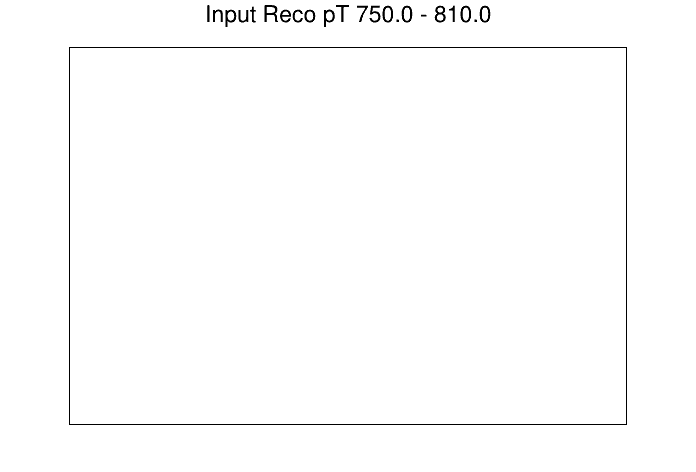

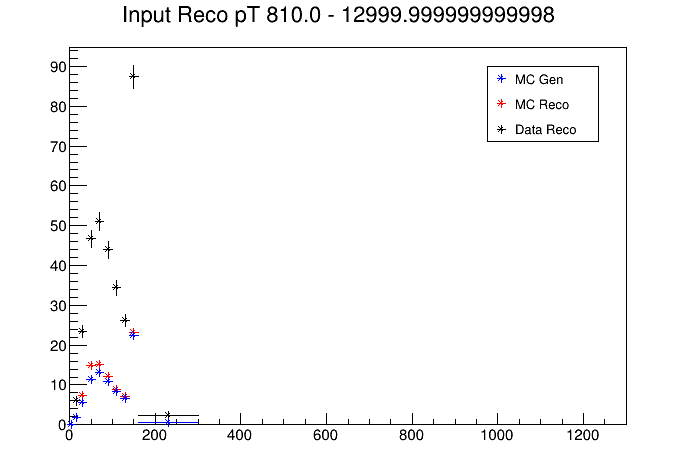

In [10]:
#### Plot reco binned in gen and gen on same plot --> use these hists to compare to unfolding
syst = "nominal"
print("Number of reco pt bins ", len(ptreco_edges)-1, " number of reco mass bins ", len(mreco_edges)-1)
print("Number of gen pt bins ", len(ptgen_edges)-1, " number of gen mass bins ", len(mgen_edges)-1)
recoBinnedi = []
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    hcopy = ROOT.TH1D("inputGenPt" + str(ipt), "Input Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    hcopy_reco = ROOT.TH1D("inputRecoPt" + str(ipt), "Input Reco pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)
-1, mgen_edges )
    hcopy_data = ROOT.TH1D("inputRecoPt" + str(ipt), "Input Reco pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)
-1, mgen_edges )
    #        hcopy.Print("all") 
    for im in range(len(mgen_edges)):
        im_r = im*2
        print("Gen mass bin ", mgen_edges[im], " reco mass bin ", mreco_edges[im_r])
        print("Gen mass bin ", im, " reco mass bin ", im_r)
        recoBinCont = histDict['MCReco_u'].GetBinContent(im_r+1+ipt*(len(mreco_edges)-1)) + histDict['MCReco_u'].GetBinContent(im_r+2+ipt*(len(mreco_edges)-1))
        recoBinErr = histDict['MCReco_u'].GetBinError(im_r+1+ipt*(len(mreco_edges)-1)) + histDict['MCReco_u'].GetBinError(im_r+2+ipt*(len(mreco_edges)-1))
        dataBinCont = DataReco_u.GetBinContent(im_r+1+ipt*(len(mreco_edges)-1)) + DataReco_u.GetBinContent(im_r+2+ipt*(len(mreco_edges)-1))
        dataBinErr = DataReco_u.GetBinError(im_r+1+ipt*(len(mreco_edges)-1)) + DataReco_u.GetBinError(im_r+2+ipt*(len(mreco_edges)-1))
        binwidth = hcopy.GetBinWidth(im)
        if binwidth>0:
            print("Bin width : ", binwidth)
            hcopy.SetBinContent(im, histDict['MCTruth_u'].GetBinContent(im+1+ipt*(len(mgen_edges)-1))/binwidth)
            hcopy.SetBinError(im, histDict['MCTruth_u'].GetBinError(im+1+ipt*(len(mgen_edges)-1))/binwidth)  
            hcopy_reco.SetBinContent(im, recoBinCont/binwidth)
            hcopy_reco.SetBinError(im, recoBinErr/binwidth) 
            hcopy_data.SetBinContent(im, dataBinCont/binwidth)
            hcopy_data.SetBinError(im, dataBinErr/binwidth) 
            print("Starting bin content ", histDict['MCTruth_u'].GetBinContent(im+1+ipt*(len(mgen_edges)-1)), " after norm ", histDict['MCTruth_u'].GetBinContent(im+1+ipt*(len(mgen_edges)-1))/binwidth)
            print("Starting bin content ", recoBinCont, " after norm ", recoBinCont/binwidth)
        else:  
            hcopy.SetBinContent(im, histDict['MCTruth_u'].GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
            hcopy.SetBinError(im, histDict['MCTruth_u'].GetBinError(im+1+ipt*(len(mgen_edges)-1)))
            hcopy_reco.SetBinContent(im, recoBinCont)
            hcopy_reco.SetBinError(im, recoBinErr) 
            hcopy_data.SetBinContent(im, dataBinCont)
            hcopy_data.SetBinError(im, dataBinErr) 
    hcopy_data.SetLineColor(ROOT.kBlack)
    hcopy_data.SetMarkerColor(ROOT.kBlack)
    hcopy_data.SetMarkerStyle(3)
    hcopy_data.Draw("e")
    hcopy_reco.SetLineColor(ROOT.kRed)
    hcopy_reco.SetMarkerColor(ROOT.kRed)
    hcopy_reco.SetMarkerStyle(3)
    hcopy_reco.Draw("e same")
    hcopy.SetLineColor(ROOT.kBlue)
    hcopy.SetMarkerColor(ROOT.kBlue)
    hcopy.SetMarkerStyle(3)
    hcopy.GetXaxis().SetTitle("MC Mass GeV")
    hcopy.Draw("e same")    
    
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                 
    leg1.AddEntry(hcopy, "MC Gen", "p")
    leg1.AddEntry(hcopy_reco, "MC Reco", "p")
    leg1.AddEntry(hcopy_data, "Data Reco", "p")
    leg1.Draw()
    ci.Draw()                                                                                                                                        
    ci.SaveAs(os_path+"MCGenRecoInput_ungroomed_"+syst+'_pt'+str(ptgen_edges[ipt])+"_"+year+".png")
    # ci.Close()
    #### add resp matrices and other hists to dictionary for final result                                                                             
    canvs.append(ci)


In [ ]:
M = syst_hist_dict["nominal"]["MCGenRec_u"]
print(M.GetName())

In [ ]:
#### Better normalization

# could replace pt and m edges with coffea hist axis object
def NormM(M, ptreco_edges, mreco_edges, ptgen_edges, mgen_edges, detectorBinning, generatorBinning, yAxis = "reco", normMassWidth = False):
    ### missing is dividing by x-axis mass bin width --> currently being done in plotting only
    if yAxis == 'reco':
        x_ptedges = ptgen_edges
        x_medges = mgen_edges
        y_ptedges = ptreco_edges
        y_medges = mreco_edges
        xbinning = generatorBinning
        xnode = "gen"
        ybinning= detectorBinning
        ynode = "reco"
    else:
        x_ptedges = ptreco_edges
        x_medges = mreco_edges
        y_ptedges = ptgen_edges
        y_medges = mgen_edges
        ybinning = generatorBinning
        ynode = "gen"
        xbinning= detectorBinning
        xnode = "reco"
    #### Normalizing by sum of values along y axis for each x-pt bin
    #### In setup where reco is on y-axis, ptedges and m edges should belong to gen
    M_norm = M.Clone(M.GetName()+"Norm")
    #### remove fakes for debugging
    # for ix in range(M_norm.GetNbinsX()+1):
    #     for iy in range(M_norm.GetNbinsY()+1):
    #         M_norm.SetBinContent(ix,iy,0.0)
    for iptx in range(len(x_ptedges)-1):
        xbin0 = iptx*(len(x_medges)-1)+1
        xbin1 = (iptx+1)*(len(x_medges)-1)+1
        binsum = M.Integral(xbin0, xbin1, 0, M.GetNbinsY()+1)
        # for iy in range(0,M.GetNbinsY()+2):
        for imx in range(len(x_medges)-1):
            ix = iptx*(len(x_medges)-1)+imx+1
            medge0 = x_medges[imx]
            medge1 = x_medges[imx+1]
            binwidth  = medge1-medge0
            for iy in range(0, M_norm.GetNbinsY()+2):
                M_norm.SetBinContent( ix,iy, M.GetBinContent(ix, iy) )
                M_norm.SetBinError( ix,iy, M.GetBinError(ix, iy) )
                if binsum >0.:
                    M_norm.SetBinContent( ix,iy, M_norm.GetBinContent(ix, iy)/binsum )
                    M_norm.SetBinError( ix,iy, M_norm.GetBinError(ix, iy)/binsum )
                if binwidth >0. and normMassWidth:
                    M_norm.SetBinContent( ix,iy, M_norm.GetBinContent(ix, iy)/binwidth )
                    M_norm.SetBinError( ix,iy, M_norm.GetBinError(ix, iy)/binwidth )
    ### normalize by bin widths
    # for ix in range(1,M_norm.GetNbinsX()+1):
    #     binx = xbinning.FindNode(xnode).GetBinName(ix)
    #     print(binx)
    #     binsize_x = xbinning.FindNode(xnode).GetBinSize(ix) 
    #     for iy in range(1,M_norm.GetNbinsY()+1):
    #         biny = ybinning.FindNode(ynode).GetBinName(iy)
    #         print(biny)
    #         binsize_y = ybinning.FindNode(ynode).GetBinSize(iy) 
    #         area = binsize_x*binsize_y
    #         print("Binarea ", area)
    #         if area > 0.0 :
    #             M_norm.SetBinContent(ix,iy, M_norm.GetBinContent(ix,iy) / area )
    #             M_norm.SetBinError(ix,iy, M_norm.GetBinError(ix,iy) / area )
    return M_norm

def NormInput(input_dist, binning, ptedges, medges, normMassWidth=False) :
    input_norm = input_dist.Clone(input_dist.GetName())
    if "Truth" in input_dist.GetName():
        node = "gen"
    else:
        node = "reco"
    for ipt in range(len(ptedges)-1) :
        globbin0 = ipt*(len(medges)-1)+1
        globbin1 = (ipt+1)*(len(medges)-1)+1
        if node=="reco":
            globbin0 = globbin0+1
            globbin1 = globbin1+1
        binsum = input_dist.Integral(globbin0,globbin1)
        for im in range(len(medges)-1): #in current setup y axis is detector
            ix = globbin0+im
            medge0 = medges[im]
            medge1 = medges[im+1]
            binwidth  = medge1-medge0
            # print(binning.FindNode(node).GetBinName(ix))
            # binsize = binning.FindNode(node).GetBinSize(ix)
            bincontent = input_dist.GetBinContent(ix)
            binerror = input_dist.GetBinError( ix)
            # if binsize > 0. :
            #     bincontent = bincontent/binsize
            #     binerror = binerror/binsize   
            # input_norm.SetBinContent(ix, bincontent)    
            # input_norm.SetBinError(ix, binerror) 
            if binsum >0. :
                bincontent = bincontent/binsum
                binerror = binerror/binsum
            if binwidth > 0. and normMassWidth:
                bincontent = bincontent/binwidth
                binerror = binerror/binwidth
            input_norm.SetBinContent(ix, bincontent)
            input_norm.SetBinError(ix, binerror) 
    return input_norm

In [ ]:
#### Normalize response matrix and draw it and original
M_norm = NormM(M, ptreco_edges, mreco_edges, ptgen_edges, mgen_edges, detectorBinning, generatorBinning, yAxis = "reco")
def norm_hist_dict(syst_hist_dict, ptreco_edges, mreco_edges, ptgen_edges, mgen_edges, detectorBinning, generatorBinning, yAxis = "reco"):
    syst_dict_norm = {}
    for syst, hist_dict in syst_hist_dict.items():
        print(syst)
        norm_dict = {}
        for hist_name, hist in hist_dict.items():
            if "GenRec" in hist_name:
                hist_norm = NormM(hist, ptreco_edges, mreco_edges, ptgen_edges, mgen_edges, detectorBinning, generatorBinning, yAxis = "reco")
                norm_dict[hist_name] = hist_norm
            elif "Truth" in hist_name:
                hist_norm = NormInput(hist, generatorBinning, ptgen_edges, mgen_edges )
                norm_dict[hist_name] = hist_norm
            elif "Reco" in hist_name:
                hist_norm = NormInput(hist, detectorBinning, ptreco_edges, mreco_edges )
                norm_dict[hist_name] = hist_norm
        syst_dict_norm[syst]=norm_dict
    return syst_dict_norm
normed_hist_dict = norm_hist_dict(syst_hist_dict, ptreco_edges, mreco_edges, ptgen_edges, mgen_edges, detectorBinning, generatorBinning, yAxis = "reco")

In [ ]:
c0 = ROOT.TCanvas("c0", "c0",2400, 800)
c0.Divide(2,1)
c0.cd(1)
M.Draw("colz")
c0.cd(2)
M_norm.Draw("colz")
c0.Draw()
#### NOTE: Need to figure out and add fakes --> only divide by reco bin width and same event value?
#### May be correct to remove fakes and scale down rest of eventd like in https://github.com/FNALLPC/unfolding-hats/blob/fd0003718d7435dee170a0b0a7cbe702e681bb7a/tunfold/unfold_data.ipynb#L171

In [ ]:
print(normed_hist_dict["nominal"])
M_norm = normed_hist_dict["nominal"]["MCGenRec_u"]
htrue_norm = normed_hist_dict["nominal"]["MCTruth_u"]
h_norm= normed_hist_dict["nominal"]["MCReco_u"]
h_norm_M=M_norm.ProjectionY("MCReco_u_norm")
htrue_norm_M=M_norm.ProjectionX("MCTruth_u_norm")
# h_norm_M_other=M_norm_other.ProjectionY("MCReco_u_normO")
# htrue_norm_M_other=M_norm_other.ProjectionX("MCTruth_u_normO")
c0 = ROOT.TCanvas("c0", "c0", 1800, 1200)
c0.Divide(2,2)
c0.cd(1)
h_norm.Draw("e")
c0.cd(2)
htrue_norm.Draw("e")
c0.cd(3)
h_norm_M.Draw("e")
c0.cd(4)
htrue_norm_M.Draw("e")
c0.cd(5)
# htrue_norm_other.Draw("e")
# c0.cd(6)
# htrue_norm_M_other.Draw("e")
c0.Draw()

In [ ]:
# h=hist["MCReco_u"]
# hdata = DataReco_u
# hdata_norm= NormInput(hdata, detectorBinning, ptreco_edges, mreco_edges )
# htrue = hist["MCTruth_u"]
# c0 = ROOT.TCanvas("c0", "c0", 2000, 1200)
# c0.Divide(3,2)
# c0.cd(1)
# h.Draw("e")
# hdata.SetLineColor(ROOT.kRed)
# hdata.SetMarkerColor(ROOT.kRed)
# hdata.SetMarkerStyle(7)
# hdata.Draw("same")
# c0.cd(2)
# h_norm.SetLineColor(ROOT.kBlue)
# h_norm.SetMarkerColor(ROOT.kBlue)
# h_norm.SetMarkerStyle(24)
# h_norm.Draw("e")
# h_norm_M.SetLineColor(ROOT.kRed)
# h_norm_M.SetMarkerColor(ROOT.kRed)
# h_norm_M.SetMarkerStyle(7)
# h_norm_M.Draw("same")
# c0.cd(3)
# h_norm_M.Draw("e")
# c0.cd(4)
# htrue.Draw("e")
# c0.cd(5)
# htrue_norm.SetLineColor(ROOT.kBlue)
# htrue_norm.SetMarkerColor(ROOT.kBlue)
# htrue_norm.SetMarkerStyle(24)
# htrue_norm.Draw("e")
# htrue_norm_M.SetLineColor(ROOT.kRed)
# htrue_norm_M.SetMarkerColor(ROOT.kRed)
# htrue_norm_M.SetMarkerStyle(7)
# htrue_norm_M.Draw("same")
# c0.cd(6)
# h_norm.SetLineColor(ROOT.kBlue)
# h_norm.SetMarkerColor(ROOT.kBlue)
# h_norm.SetMarkerStyle(24)
# h_norm.Draw("e")
# hdata_norm.SetLineColor(ROOT.kRed)
# hdata_norm.SetMarkerColor(ROOT.kRed)
# hdata_norm.SetMarkerStyle(7)
# hdata_norm.Draw("same")
# c0.Draw()

In [ ]:
plotMatrixInputs(ptgen_edges, mgen_edges, normed_hist_dict["nominal"], "MCTruth_u", os_path = os_path+"Norm", norm_by_bw=True)
#### should be divided by bin width already -- figure out why failing

In [ ]:
plotinputsROOT(M_norm, htrue_norm, h_norm, groom="ungroomed", syst="nominal", year=year, ospath=os_path+"normed")

In [ ]:
#### do unfolding
#### M is response matrix, h is recotruth, hdata is data to be unfolded
def doUnfold(hdata, syst_hist_dict, availSysts, closure = False, Reg = False, groomed = True,os_path=None):
    if groomed:
        respStr = "MCGenRec_g"
        M = syst_hist_dict["nominal"]["MCGenRec_g"]
        h = syst_hist_dict["nominal"]["MCReco_g"]
        os_path=os_path+"Groomed"
    else:
        respStr = "MCGenRec_u"
        M = syst_hist_dict["nominal"]["MCGenRec_u"]
        h = syst_hist_dict["nominal"]["MCReco_u"]
        os_path=os_path+"Ungroomed"
    orientation = ROOT.TUnfold.kHistMapOutputHoriz
    regMode = ROOT.TUnfold.kRegModeCurvature
    con = ROOT.TUnfold.kEConstraintArea
    mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
    axisSteering =  "*[b]"
    #u = ROOT.TUnfoldDensity(M, orientation, regMode, con, mode, genBin, detBin, "signal", axisSteering)

    u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
    # u_test = ROOT.TUnfoldDensity(syst_hist_dict["jerUp"]["MCGenRec_u"],orientation,regMode,con)
    if closure:
        u.SetInput(h)
        os_path=os_path+"Closure"
        # u_test.SetInput(h)
    else:
        u.SetInput(hdata)
        # u_test.SetInput(hdata)
    for syst in [syst for syst in availSysts if syst!="nominal"]:
        u.AddSysError(syst_hist_dict[syst][respStr], syst, orientation,  ROOT.TUnfoldDensity.kSysErrModeMatrix)
    nScan=50
    tauMin=0.0
    tauMax=0.0
    iBest=0

    logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
    logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
    lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
    if not Reg:
        u.DoUnfold(0.0)
        os_path = os_path+"NoReg"
    else:
        iBest=u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
    o = u.GetOutput("o")
    return u, o, os_path, lCurve, iBest

In [ ]:
#### NEED TO EDIT AND IMPLEMENT FOLLOWING CODE BLOCK TO ACCOUNT FOR FAKES 
# # Scale down 'ttbar' part of measurement to account for fake fraction, as given by response matrix
# for ii in xrange(1,response.GetNbinsX()+1):
#     if response.Integral(ii,ii,0,response.GetNbinsY()+1) > 0.0 :
#         fakefraction = response.GetBinContent(ii,0) / response.Integral(ii,ii,0,response.GetNbinsY()+1)
#         measurement.SetBinContent(ii,measurement.GetBinContent(ii)*(1.0-fakefraction))
#         measurement.SetBinError(ii,measurement.GetBinError(ii)*(1.0-fakefraction))
#         response.SetBinContent(ii,0,0)
#         response.SetBinError(ii,0,0)

In [ ]:
# -------------------------------------------------------------------------------------
# Draw response matrix
# -------------------------------------------------------------------------------------

c1 = ROOT.TCanvas("c1", "", 800, 600)
c1.SetTopMargin(0.07)
c1.SetRightMargin(0.15)
c1.SetBottomMargin(0.15)
c1.SetLeftMargin(0.15) 

M.SetTitle(";Gen mass in bins of pT (bin #);reco mass in bins of pT (bin #)")
M.GetZaxis()
M.Draw("colz")
c1.SetLogz()
c1.Draw()
c1.SaveAs(os_path+"RespMatrix_ungroomed_nominal"+year+".png")


In [ ]:
if "dijet" in fname:
    os_path = "plots/unfolding/dijet/"
else:
    os_path = "plots/unfolding/trijet/"
##### Do unfolding absolute, Ungroomed
u,o,os_path, lCurve, iBest = doUnfold(hdata = DataReco_u,syst_hist_dict=syst_hist_dict, availSysts=availSysts, closure = False, Reg = True, 
                       groomed = False, os_path=os_path)
htrue = syst_hist_dict["nominal"]["MCTruth_u"]
#### Test w/ JER only
# jerUp_dict = {}
# jerUp_dict["nominal"]=syst_hist_dict["jerUp"]
# uJERup,oJERup,os_path, lCurveJERup, iBestJERup = doUnfold(hdata = DataReco_u,syst_hist_dict=jerUp_dict, availSysts=["nominal"], closure = False, Reg = True, 
#                        groomed = False, os_path=os_path)
# htrueJERup = syst_hist_dict["jerUp"]["MCTruth_u"]

##### Do unfolding absolute, Groomed
# u,o,os_path = doUnfold(hdata = DataReco_g,syst_hist_dict=syst_hist_dict, availSysts=availSysts, closure = False, Reg = True, 
#                        groomed = True, os_path=os_path)
# htrue = syst_hist_dict["nominal"]["MCTruth_g"]

##### Do unfolding normalized, ungroomed
# u,o,os_path = doUnfold(hdata = hdata_norm,syst_hist_dict=normed_hist_dict, availSysts=availSysts, closure = True, Reg = False, 
#                        groomed = True, os_path=os_path)
# htrue = normed_hist_dict["nominal"]["MCTruth_g"]
# os_path=os_path+"Norm"

##### Do unfolding normalized, ungroomed
# u,o,os_path, lCurve, iBest = doUnfold(hdata = hdata_norm,syst_hist_dict=normed_hist_dict, availSysts=availSysts, closure = True, Reg = True, 
#                         groomed = False, os_path=os_path)
# htrue = normed_hist_dict["nominal"]["MCTruth_u"]
# os_path=os_path+"Norm"

In [ ]:
%jsroot off
o.SetMarkerStyle(7)
o.SetLineColor(ROOT.kBlack)

htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
o.Draw("e")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with uncertainties"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_allbins"+year+".png")

In [ ]:
#### Plot Lcurve
cL = ROOT.TCanvas()
x = array.array('d',[0] )
y = array.array('d',[0] )
lCurve.Draw('alp same')

lCurve.GetPoint(iBest, x, y)

bestLCurve=ROOT.TGraph(1,x,y)
bestLCurve.SetMarkerStyle(3)
bestLCurve.SetMarkerColor(ROOT.kRed)
bestLCurve.Draw('same *')
cL.Draw()

In [ ]:
# #### check delta sys mehtod
# jerUp_del = u.GetDeltaSysSource('jerUp',  'jerUp'+'Err')
# jerUp_M = o-oJERup
# jerUp_Add=oJERup.Clone("added")
# jerUp_Add.Add(o, -1)
# print(jerUp_Add)
# print("Jer from delta sys ", [jerUp_del.GetBinContent(i) for i in range(jerUp_del.GetNbinsX())])
# #print("Fractional unc from delta sys", np.divide(np.array([jerUp_del.GetBinContent(i) for i in range(jerUp_del.GetNbinsX())]), np.array([o.GetBinContent(i)for i in range(jerUp_del.GetNbinsX())]),
# #                                                out=np.empty(np.array(jerUp_del.GetNbinsX()).fill(np.nan)), where=[o.GetBinContent(i)for i in range(jerUp_del.GetNbinsX())]!=0))
# print("Jer up from subtracting TH1s in python ", [jerUp_M.GetBinContent(i) for i in range(jerUp_del.GetNbinsX())])
# print("Jer up from subtracting TH1s using root ", [jerUp_Add.GetBinContent(i) for i in range(jerUp_del.GetNbinsX())])
# #print("Fractional unc by hand", [jerUp_del.GetBinContent(i)/o.GetBinContent(i) for i in range(jerUp_del.GetNbinsX())])

In [ ]:
no_influence=[]
def getTotSyst(o,u, availSysts, no_influence=None):
    oSys = ROOT.TGraphAsymmErrors(o.Clone("Systematic"))
    oSys.Print("range")
    syst_uncorr = [
    'jerUp','jerDown'
    'PUSFUp','PUSFDown', #PDFs WIP
    'L1prefiringDown', 'L1prefiringUp', 
    'AbsoluteStatUp','AbsoluteStatDown',
    'FlavorQCDUp','FlavorQCDDown',
    'FragmentationUp','FragmentationDown',
    'PileUpDataMCUp','PileUpDataMCDown',
    'RelativeBalUp','RelativeBalDown',
    'RelativeJEREC1Up','RelativeJEREC1Down',
    'RelativeJEREC2Up','RelativeJEREC2Down',
    'RelativePtEC1Up','RelativePtEC1Down',
    'RelativePtEC2Up','RelativePtEC2Down',
    'RelativeSampleUp','RelativeSampleDown',
    'RelativeStatECUp','RelativeStatECDown',
    'RelativeStatFSRUp','RelativeStatFSRDown',
    'RelativeStatHFUp','RelativeStatHFDown',
]

    absolute = ['AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown',
                'AbsoluteScaleUp', 'AbsoluteScaleDown']
    pileuppt = ['PileUpPtBBUp', 'PileUpPtBBDown', 
                'PileUpPtEC1Up', 'PileUpPtEC1Down',
                'PileUpPtEC2Up', 'PileUpPtEC2Down', 
                'PileUpPtHFUp', 'PileUpPtHFDown', 
                'PileUpPtRefUp', 'PileUpPtRefDown']
    relpt = ['RelativePtEC1Up', 'RelativePtEC1Down','RelativePtHFUp', 'RelativePtHFDown']
    singlepion =     ['SinglePionECALUp', 'SinglePionECALDown','SinglePionHCALUp', 'SinglePionHCALDown']
    timepteta = ['TimePtEtaUp', 'TimePtEtaDown']

    availSysts = [syst for syst in availSysts if syst!="nominal"]
    syst_uncorr = [syst for syst in syst_uncorr if syst in availSysts]
    corr_grps = [absolute, pileuppt, relpt, singlepion, timepteta]
    systErr = {}  
    #### For all systs get differences between syst and nominal hist and add to dictionary
    for syst in availSysts:
        # print("Adding syst to dict", syst)
        systErr.update({syst: u.GetDeltaSysSource(syst,  syst+'Err')})
        print(systErr[syst])
        print([systErr[syst].GetBinContent(i) for i in range(systErr[syst].GetNbinsX())])
        # systErr[syst].Print("range")
    # sysErrTot_up = o.Clone("Systematic")
    # sysErrTot_up.Reset()
    # sysErrTot_up.SetName("TotSystUp")
    # sysErrTot_down = o.Clone("Systematic")
    # sysErrTot_down.Reset()
    # sysErrTot_down.SetName("TotSystDown")
    sysErrTot_up = np.zeros(o.GetNbinsX())
    sysErrTot_down = np.zeros(o.GetNbinsX())
    #### Loop through uncorrelated groups and add them linearly
    for grp in corr_grps:
        # grp_unc_total_up = o.Clone("Systematic")
        # grp_unc_total_up.Reset()
        # grp_unc_total_up.SetName("CorrSystDown")
        # grp_unc_total_down  = o.Clone("Systematic")
        # grp_unc_total_down.Reset()
        # grp_unc_total_down.SetName("CorrSystDown")
        grp_unc_total_up = np.zeros(o.GetNbinsX())
        grp_unc_total_down = np.zeros(o.GetNbinsX())
        for syst in grp:
            print(syst, " added")
            if "Up" in syst and syst in availSysts:
                for i in range(1, o.GetNbinsX()+1):
                    grp_unc_total_up[i-1]+= abs(systErr[syst].GetBinContent(i))
                #     grp_unc_total_up.SetBinContent(i, grp_unc_total_up.GetBinContent(i) + abs(systErr[syst].GetBinContent(i)))
            if "Down" in syst and syst in availSysts:
                for i in range(1, o.GetNbinsX()+1):
                    grp_unc_total_down[i-1]+= abs(systErr[syst].GetBinContent(i))
                #     grp_unc_total_down.SetBinContent(i, grp_unc_total_down.GetBinContent(i) + abs(systErr[syst].GetBinContent(i)))
        # print("Total unc up ", grp_unc_total_up," and down ", grp_unc_total_down, "for group ", grp)
        sysErrTot_up +=grp_unc_total_up**2
        sysErrTot_down +=grp_unc_total_down**2
        # sysErrTot_up.SetBinContent(i, sysErrTot_up.GetBinContent(i) + grp_unc_total_up.GetBinError(i)**2)
        # sysErrTot_down.SetBinContent(i, sysErrTot_down.GetBinContent(i) + grp_unc_total_down.GetBinError(i)**2)
    # print("Total corr unc up ", sysErrTot_up," and down ", sysErrTot_up)
    #### Loop through uncorrelated uncertainties and add together with correlated groups in quadrature
    for syst, syst_vals in systErr.items():
        if "Up" in syst and syst in syst_uncorr:
            for i in range(1, o.GetNbinsX()+1):
            #     sysErrTot_up.SetBinContent(i, sysErrTot_up.GetBinContent(i) + abs(systErr[syst].GetBinContent(i))**2)
                sysErrTot_up[i-1] += systErr[syst].GetBinContent(i)**2
        if "Down" in syst and syst in syst_uncorr:
            for i in range(o.GetNbinsX()):
            #     sysErrTot_down.SetBinContent(i, sysErrTot_down.GetBinContent(i) + abs(systErr[syst].GetBinContent(i))**2)
                sysErrTot_down[i-1] += systErr[syst].GetBinContent(i)**2
    print("Total corr+uncrorr unc up ", sysErrTot_up," and down ", sysErrTot_up)
    for i in range(1, o.GetNbinsX()+1):
        oSys.SetPointEYhigh(i-1, sysErrTot_up[i-1]**0.5)
        oSys.SetPointEYlow(i-1, sysErrTot_down[i-1]**0.5)
        print("Final upper syst ", sysErrTot_up[i-1]**0.5, " and lower syst ", sysErrTot_down[i-1]**0.5, " for value ", o.GetBinContent(i), " which should match ", oSys.GetPointY(i-1) )
    return oSys

In [ ]:
# P =  u.GetProbabilityMatrix("Matrix prob")
# mCovUncorr = u.GetEmatrixSysUncorr("Matrix unc")
# for i in range(M.GetNbinsX()):
#     print("Bin ", i)
#     print("Response matrix only content", M.GetBinContent(i,i))
#     print("Response matrix only stat err", M.GetBinError(i,i))
#     print("Resp matrix integral along Y", M.Integral(i,i,0,P.GetNbinsY()))
#     print("Probability matrix value", P.GetBinContent(i,i))
#     print("P matrix integral along Y",P.Integral(i,i,0,P.GetNbinsY()))
#     print("Matrix Stat err", mCovUncorr.GetBinContent(i,i)**0.5)

In [ ]:
oSys = getTotSyst(o,u, availSysts, no_influence=None)

In [ ]:
# for syst in syst_list:
#     if syst not in syst_uncorr[:]:
#         systErr.update({syst: u.GetDeltaSysSource(syst,  syst+'Err')})

#         for i in range(1, o.GetNbinsX()+1):
#             oSys.SetBinError(i, oSys.GetBinError(i) + pow(systErr[syst].GetBinContent(i), 2) )

        
# for i in range(1, o.GetNbinsX()+1):
#     oSys.SetBinError(i, oSys.GetBinError(i)**0.5 )
    
# for syst in syst_uncorr:
#     systErr.update({syst: u.GetDeltaSysSource(syst,  syst+'Err')})
#     for i in range(1, o.GetNbinsX()+1):
#         oSys.SetBinError(i, oSys.GetBinError(i) + abs(systErr[syst].GetBinContent(i)))
#### Fill other uncertainties
oInput = o.Clone("Input stat")
oMat = o.Clone("Matrix stat")
# oTotal = o.Clone("Total stat")
oTotal = ROOT.TGraphAsymmErrors(o.Clone("Total stat"))
# cov = u.GetEmatrixTotal("cov", "Covariance Matrix")
mCovInput = u.GetEmatrixInput("Input unc")
mCovUncorr = u.GetEmatrixSysUncorr("Matrix unc")

for i in range(1, o.GetNbinsX()+1):
    inputErr = mCovInput.GetBinContent(i,i)**0.5
    matrixErr = mCovUncorr.GetBinContent(i,i)**0.5
    
    oInput.SetBinError(i, inputErr )
    oMat.SetBinError(i,  matrixErr )
    # oTotal.SetBinError(i,  np.sqrt( oSys.GetBinError(i)**2 + oInput.GetBinError(i)**2 + oMat.GetBinError(i)**2 ) )
    oTotal.SetPointEYhigh(i, np.sqrt( oSys.GetErrorY(i)**2 + oInput.GetBinErrorUp(i)**2 + oMat.GetBinErrorUp(i)**2 ))
    oTotal.SetPointEYlow(i, np.sqrt( oSys.GetErrorY(i)**2 + oInput.GetBinErrorLow(i)**2 + oMat.GetBinErrorLow(i)**2 ))
oTotal.Print()

In [ ]:
oInput.SetMarkerStyle(0)
oInput.SetLineColor(ROOT.kBlack)
oInput.SetFillColor(ROOT.kGreen-7)

htrue.SetMarkerStyle(2)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
oInput.Draw("e2")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with only Input uncertainty"
leg.AddEntry(oInput, legstr, "f")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()
a.SaveAs
#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingDataOutput_ungroomed_inputStat_allbins"+year+".png")

In [ ]:
oMat.SetMarkerStyle(0)
oMat.SetLineColor(ROOT.kBlack)
oMat.SetFillColor(ROOT.kYellow-4)

htrue.SetMarkerStyle(2)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
oMat.Draw("e2")
o.Draw("e same")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with only Matrix uncertainty"
leg.AddEntry(oMat, legstr, "f")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_ungroomed_matrixUnc_allbins"+year+".png")

In [ ]:
# def plotOutputUncPretty(o):
# oInput = o.Clone("Input stat")
# oMat = o.Clone("Matrix stat")
# oTotal  = o.Clone("Total unc")


# mCovInput = u.GetEmatrixInput("Input unc")
# mCovUncorr = u.GetEmatrixSysUncorr("Matric unc")

# for i in range(1, o.GetNbinsX()+1):
#     oInput.SetBinError(i, mCovInput.GetBinContent(i,i)**0.5 )
#     oMat.SetBinError(i, mCovUncorr.GetBinContent(i,i)**0.5 )    
#     oTotal.SetBinError(i, np.sqrt( oSys.GetBinError(i)**2 + oInput.GetBinError(i)**2 + oMat.GetBinError(i)**2 ))
oSys.SetMarkerStyle(0)
oSys.SetLineColor(ROOT.kBlack)
oSys.SetFillColor(ROOT.kBlue-7)

oInput.SetMarkerStyle(0)
oInput.SetLineColor(ROOT.kBlack)
oInput.SetFillColor(ROOT.kGreen)




oTotal.SetMarkerStyle(0)
oTotal.SetLineColor(ROOT.kBlack)
oTotal.SetFillColor(ROOT.kOrange-4)

oMat.SetMarkerStyle(0)
oMat.SetLineColor(ROOT.kBlack)
oMat.SetFillColor(ROOT.kRed)

htrue.SetMarkerStyle(2)
htrue.SetMarkerColor(ROOT.kOrange)

a = ROOT.TCanvas()

o.Draw("e")
# oTotal.Draw("e2 same")
oSys.Draw("e2 same")
oMat.Draw("e2 same")
oInput.Draw("e2 same")
o.Draw("e same")
htrue.Draw("e same")


leg = ROOT.TLegend(0.9,0.9,0.9,0.9)

leg.AddEntry(oMat, "Matrix Stat. Uncertainty", "f")
leg.AddEntry(oSys, "Systematic Uncertainties", "f")
leg.AddEntry(oInput, "Input Stat. Uncertainty", "f")
leg.AddEntry(oTotal, "Total Uncertainty", "f")
leg.AddEntry(o, "Unfolded value", "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_allUnc_allbins"+year+".png")

In [ ]:
def plotUnfoldOutputHist(htrue, u, groomed=False, norm=True, os_path='', channel='', IOV=''): #, oMat, oSys, oTotal):                                                 
    #### plotting options                                                                                                                                     
    tot_error_opts = {
            'label': 'Stat. Unc.',
            'facecolor': 'powderblue',
            'linewidth': 0
        }
    stat_error_opts = {
            'label': 'Stat. Unc.',
                    'hatch': '///',
                    'edgecolor': 'black',
            'facecolor': 'none',
            'linewidth': 0
        }
    data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': 'k',
            'elinewidth': 1,
        }
    #### u is total unfolding object, htrue is truth hist from coffea                                                                                         
    o = u.GetOutput("u")
    mCovInput = u.GetEmatrixInput("Input unc")
    inputErrTot = np.array([mCovInput.GetBinContent(i,i)**0.5 for i in range(0, o.GetNbinsX()+1)])
    ptedges = [bin[0] for bin in htrue.project("ptgen").axes[0]] + [htrue.project("ptgen").axes[0][-1][1]]
    print(ptedges)
    medges = [bin[0] for bin in htrue.project('mgen').axes[0]]+ [htrue.project('mgen').axes[0][-1][1]]
    print(medges)
    widths = htrue.project("mgen").axes[0].widths
    xlim = medges[-1]
    if groomed: os_path=os_path+"Groomed"
    for ipt in range(len(ptedges)-1):
        inputErr = np.array([inputErrTot[(im+1+ipt*(len(medges)-1))] for im in range(len(medges)-1)])
        oErr = np.array([o.GetBinError(im+1+ipt*(len(medges)-1)) for im in range(len(medges)-1)])
        oVals = np.array([o.GetBinContent(im+1+ipt*(len(medges)-1)) for im in range(len(medges)-1)])
        oHistVals = np.array([o.GetBinContent(im+1+ipt*(len(medges)-1)) for im in range(len(medges)-1)])
        oHistErr = oErr
        hist = htrue[{'ptgen':ipt, 'syst':"nominal"}].project("mgen")
        #### set up figure                                                                                                                                    
        fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
        ax.set_ylabel(r'$\frac{Events}{Bin Size} (GeV^{-1})$', loc = 'top')
        ax.text(0.60, 0.70, str(ptedges[ipt])+r"$<p_{T}<$" +str(ptedges[ipt+1]) + " GeV",
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='green', fontsize=14)
        rax.set_ylim(0.5, 2)
        ax.set_xlim(5, 1000.)
        ax.set_yscale('log')
        rax.set_xlim(5, 1000.)
        hep.cms.label("Preliminary", year=IOV, data = True, loc=0, ax=ax, fontsize=18);
        if groomed:
            ax.set_xlabel(r'$m_{SD, RECO} (GeV)$' )
        if norm:
            print("Check that sum of values ", np.sum(hist.values())," is same as integrate ", hist.integrate("mgen").value)
            hist = hist*1.0/hist.integrate("mgen").value
            oVals_sum = np.sum(oVals)
            oHistVals = oVals*1.0/oVals_sum
            oHistErr = np.sqrt(oVals)/oVals_sum
            #inputErr = inputErr*1.0/oVals_sum
            print("oVals after norm ", oVals, " by value ", np.sum(oVals))
        ratio = np.divide(hist.values(),oHistVals,
                      out=np.empty(np.array(hist.project("mgen").values()).shape).fill(1),
                      where= oHistVals!=0,)
        # ratio_staterr_up = np.divide(mcvals.values()+stat_unc_up+syst_unc_up,datavals.values(),                                                             
        #               out=np.empty(np.array(mcvals.values()).shape).fill(np.nan),                                                                           
        #               where=datavals.values()!= 0,)                                                                                                         
        # ratio_staterr_down = np.divide(mcvals.values()-stat_unc_down-syst_unc_down,datavals.values(),                                                       
        #               out=np.empty(np.array(mcvals.values()).shape).fill(np.nan),                                                                           
        #               where=datavals.values()!= 0,)         
        ratio_toterr_up = np.divide(oHistVals+oHistErr,oHistVals,
                      out=np.empty(np.array(oVals.shape)).fill(np.nan),
                      where=oHistVals!= 0,)
        ratio_toterr_down = np.divide(oHistVals-oHistErr,oHistVals,
                      out=np.empty(np.array(oVals.shape)).fill(np.nan),
                      where=oHistVals!= 0,)
        ratio_err = np.abs(np.divide(oHistErr,oHistVals,
                      out=np.empty(np.array(oVals.shape)).fill(np.nan),
                      where=oHistVals!= 0,))
        rax.stairs(values=ratio_toterr_up, edges = medges, baseline= ratio_toterr_down,
                fill=True,
                **tot_error_opts,
            )
        # rax.stairs(values=ratio_statterr_up, edges = medges, baseline= ratio_statterr_down,                                                                 
        #         fill=True,                                                                                                                                  
        #         **stat_error_opts,                                                                                                                          
        #     )                                                                                                                                               
        ax.stairs(values=(oHistVals+oHistErr)/widths, edges = medges, baseline= (oHistVals-oHistErr)/widths,
                fill=True,
                **tot_error_opts,
            )
        # ax.stairs(values=(mcvals.values()+stat_unc_up)/widths, edges = edges, baseline= (mcvals.values()-stat_unc_down)/widths,                             
        #         fill=True,                                                                                                                                  
        #         **stat_error_opts,                         
        #     )                                                                                                                                               
        hep.histplot(oHistVals, medges, stack=False, histtype='errorbar', yerr = abs(oHistErr),
                 ax=ax, marker =["."], color = 'Black', linewidth=1, binwnorm=True,
                 label="Unfolded "+channel+" Data")
        hep.histplot(hist, stack=False, histtype='step',
                 ax=ax, linestyle ='--', color = 'Black', linewidth=1, binwnorm=True,
                     label="MC Truth "+channel)
        hep.histplot(ratio, medges, histtype='step', ax=rax, linestyle ="--", color = 'black', linewidth=1)
        hep.histplot(np.ones_like(ratio), medges, histtype='errorbar',ax=rax,marker=['.'], color = 'black', linewidth=1, yerr = ratio_err)
        leg = ax.legend(loc='best', fontsize=14, labelspacing=0.25)
        leg.set_visible(True)
        if norm:
            fig.savefig(os_path+"UnfoldOutputRatioPt{}_{}_normed.png".format(ptedges[ipt], ptedges[ipt+1]), bbox_inches="tight") 
        else:
            fig.savefig(os_path+"UnfoldOutputRatioPt{}_{}.png".format(ptedges[ipt], ptedges[ipt+1]), bbox_inches="tight") 

In [ ]:
plotUnfoldOutputHist(result["response_matrix_u"], u)

In [ ]:
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    syscopy = ROOT.TH1D("systUncPt" + str(ipt), "Syst Unc. pT " + str(int(ptgen_edges[ipt])) +" - " +str(int(ptgen_edges[ipt+1])), len(mgen_edges)-1, mgen_edges)
    inputcopy = ROOT.TH1D("inputUncPt" + str(ipt), "Input Unc. pT " + str(int(ptgen_edges[ipt])) +" - " +str(int(ptgen_edges[ipt+1])), len(mgen_edges)-1, mgen_edges)
    matcopy = ROOT.TH1D("matUncPt" + str(ipt), "Matrix Unc. pT " + str(int(ptgen_edges[ipt])) +" - " +str(int(ptgen_edges[ipt+1])), len(mgen_edges)-1, mgen_edges)
    totcopy = ROOT.TH1D("totUncPt" + str(ipt), "Total Unc. pT " + str(int(ptgen_edges[ipt])) +" - " +str(int(ptgen_edges[ipt+1])), len(mgen_edges)-1, mgen_edges)
    htruecopy = ROOT.TH1D("hTruePt" + str(ipt), "True Gen pT " + str(int(ptgen_edges[ipt])) +" - " +str(int(ptgen_edges[ipt+1])), len(mgen_edges)-1, mgen_edges)
    hcopy = ROOT.TH1D("hPt" + str(ipt), "True Gen pT " + str(int(ptgen_edges[ipt])) +" - " +str(int(ptgen_edges[ipt+1])), len(mgen_edges)-1, mgen_edges)
#        hcopy.Print("all") 
    canvs = []
    for im in range(len(mgen_edges)):
        if hcopy.GetBinWidth(im) > 0:
            binsize = hcopy.GetBinWidth(im)
        else:
            binsize = 1
        syscopy.SetBinContent(im, oSys.GetPointY(im+1+ipt*(len(mgen_edges)-1))/binsize)
        syscopy.SetBinError(im, oSys.GetErrorY(im+1+ipt*(len(mgen_edges)-1))/binsize) 
        inputcopy.SetBinContent(im, oInput.GetBinContent(im+1+ipt*(len(mgen_edges)-1))/binsize)
        inputcopy.SetBinError(im, oInput.GetBinError(im+1+ipt*(len(mgen_edges)-1))/binsize) 
        matcopy.SetBinContent(im, oMat.GetBinContent(im+1+ipt*(len(mgen_edges)-1))/binsize)
        matcopy.SetBinError(im, oMat.GetBinError(im+1+ipt*(len(mgen_edges)-1))/binsize) 
        totcopy.SetBinContent(im, oTotal.GetPointY(im+1+ipt*(len(mgen_edges)-1))/binsize)
        totcopy.SetBinError(im, oTotal.GetErrorY(im+1+ipt*(len(mgen_edges)-1))/binsize) 
        hcopy.SetBinContent(im, htrue.GetBinContent(im+1+ipt*(len(mgen_edges)-1))/binsize)
        hcopy.SetBinError(im, htrue.GetBinError(im+1+ipt*(len(mgen_edges)-1))/binsize)
    syscopy.SetMarkerStyle(0)
    syscopy.SetLineColor(ROOT.kBlack)
    syscopy.SetFillColor(ROOT.kBlue)
    inputcopy.SetMarkerStyle(0)
    inputcopy.SetLineColor(ROOT.kBlack)
    inputcopy.SetFillColor(ROOT.kGreen)
    matcopy.SetMarkerStyle(0)
    matcopy.SetLineColor(ROOT.kBlack)
    matcopy.SetFillStyle(3354)
    matcopy.SetFillColor(ROOT.kBlack)
    totcopy.SetMarkerStyle(0)
    totcopy.SetLineColor(ROOT.kBlack)
    totcopy.SetFillColor(ROOT.kOrange-4)
    hcopy.SetMarkerStyle(7)
    hcopy.SetMarkerColor(2)
    totcopy.GetXaxis().SetTitle("Unfolded Mass GeV")
    totcopy.GetYaxis().SetTitle("#frac{Events}{bin size} GeV^{-1}") 
    totcopy.GetXaxis().SetRange(1,totcopy.GetNbinsX()-1)
    # totcopy.Draw("e2")
    # syscopy.Draw("e2 same") 
    inputcopy.Draw("e2")
    # matcopy.Draw("e2 same")
    hcopy.Draw("e same")
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                    
    leg1.AddEntry(matcopy, "Matrix Stat. Uncertainty", "f")
    leg1.AddEntry(syscopy, "Systematic Uncertainties", "f")
    leg1.AddEntry(inputcopy, "Input Stat. Uncertainty", "f")
    leg1.AddEntry(totcopy, "Total Uncertainty", "f")
    leg1.AddEntry(hcopy, "True", "p")
    leg1.Draw()
    # ci.SetLogy()
    ci.Draw()                                                                                                                                        
    ci.SaveAs(os_path+"Unfolded_sepUnc_pt"+str(int(ptgen_edges[ipt]))+"_"+year+".png")
    canvs.append(ci)
    hists.append(hcopy)
    ci.Show()

In [ ]:
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    inputcopy = ROOT.TH1D("inputUncPt" + str(ipt), "Input Unc. pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    matcopy = ROOT.TH1D("matUncPt" + str(ipt), "Matrix Unc. pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    syscopy = ROOT.TH1D("systUncPt" + str(ipt), "Syst Unc. pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    totcopy = ROOT.TH1D("totUncPt" + str(ipt), "Total Unc. pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    htruecopy = ROOT.TH1D("hTruePt" + str(ipt), "True Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    # hcopy = ROOT.TH1D("hPt" + str(ipt), "Unfolded pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
#        hcopy.Print("all") 
    canvs = []
    hists =       [syscopy,   totcopy,        inputcopy, matcopy,    htruecopy]
    histsrcs =    [oSys,      oTotal,         oInput,    oMat,       htrue]
    markerstyle = [0,         0,              0,         0,          7,         7]
    fillcolor =   [ROOT.kBlue,ROOT.kOrange-4,ROOT.kGreen,ROOT.kBlack,2,ROOT.kBlack]
    fillstyle =   [None,      None,         None,       3354,       None,         None]
    linecolor = [ROOT.kBlack, ROOT.kBlack, ROOT.kBlack, ROOT.kBlack, None, None]
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)  
    for i in range(0, 2):
        print(hists[i].GetName())
        for im in range(len(mgen_edges)):
            if hists[i].GetBinWidth(im)>0:   
                hists[i].SetPointY(im, histsrcs[i].GetPointY(im+1+ipt*(len(mgen_edges)-1))/hist.GetBinWidth(im))
                hists[i].SetErrorY(im, histsrcs[i].GetErrorY(im+1+ipt*(len(mreco_edges)-1))/hist.GetBinWidth(im))
            else:  
                hists[i].SetPointY(im, histsrcs[i].GetPointY(im+1+ipt*(len(mgen_edges)-1)))
                hists[i].SetErrorY(im, histsrcs[i].GetErrorY(im+1+ipt*(len(mgen_edges)-1))) 
        hists[i].SetMarkerStyle(markerstyle[i])
        hists[i].SetMarkerColor(fillcolor[i])
        hists[i].SetFillColor(fillcolor[i])
        if linecolor[i]!=None:
            hists[i].SetLineColor(linecolor[i])
        if fillstyle[i]!=None:
            hists[i].SetFillStyle(fillstyle[i])
        hists[i].GetXaxis().SetTitle("Unfolded Mass GeV")
        hists[i].GetYaxis().SetTitle("#frac{Events}{bin size} GeV^{-1}")
        if i == 0:
            hists[i].Draw("e2")    
        else:
            hists[i].Draw("e2 same") 
        hists[i].GetXaxis().SetTitle("Unfolded Mass GeV")
    for i in range(2, len(hists)):
        for im in range(len(mgen_edges)):
            if hists[i].GetBinWidth(im)>0:   
                hists[i].SetBinContent(im, histsrcs[i].GetBinContent(im+1+ipt*(len(mgen_edges)-1))/hist.GetBinWidth(im))
                hists[i].SetBinError(im, histsrcs[i].GetBinError(im+1+ipt*(len(mreco_edges)-1))/hist.GetBinWidth(im))
            else:  
                hists[i].SetBinContent(im, histsrcs[i].GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
                hists[i].SetBinError(im, histsrcs[i].GetBinError(im+1+ipt*(len(mgen_edges)-1))) 
        hists[i].SetMarkerStyle(markerstyle[i])
        hists[i].SetMarkerColor(fillcolor[i])
        hists[i].SetFillColor(fillcolor[i])
        if linecolor[i]!=None:
            hists[i].SetLineColor(linecolor[i])
        if fillstyle[i]!=None:
            hists[i].SetFillStyle(fillstyle[i])
        hists[i].GetXaxis().SetTitle("Unfolded Mass GeV")
        hists[i].GetYaxis().SetTitle("#frac{Events}{bin size} GeV^{-1}")
        if i == 0:
            hists[i].Draw("e2")    
        else:
            hists[i].Draw("e2 same") 
        hists[i].GetXaxis().SetTitle("Unfolded Mass GeV")
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                    
    leg1.AddEntry(matcopy, "Matrix Stat. Uncertainty", "f")
    leg1.AddEntry(syscopy, "Systematic Uncertainties", "f")
    leg1.AddEntry(inputcopy, "Input Stat. Uncertainty", "f")
    leg1.AddEntry(totcopy, "Total Uncertainty", "f")
    leg1.AddEntry(hcopy, "True", "p")
    leg1.Draw()
    # ci.SetLogy()
    ci.Draw()                                                                                                                                        
    # ci.SaveAs(os_path+"UnfoldedClosure_ungroomed_sepUnc_pt"+str(ptgen_edges[ipt])+"_"+year+".png")
    canvs.append(ci)
    hists.append(hcopy)
print(hists)

In [ ]:
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    hcopy = ROOT.TH1D("inputGenPt" + str(ipt), "Input Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    hcopy_M = ROOT.TH1D("inputMATRIXGenPt" + str(ipt), "InputMATRIX Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)
-1, mgen_edges )
#        hcopy.Print("all") 
    canvs = []
    hists = []
    for im in range(len(mgen_edges)):
        hcopy.SetBinContent(im, o.GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
        hcopy.SetBinError(im, oTotal.GetBinError(im+1+ipt*(len(mgen_edges)-1)))                                                                                                                   
    hcopy.SetLineColor(ROOT.kBlue)
    hcopy.SetMarkerColor(ROOT.kBlue)
    hcopy.GetXaxis().SetTitle("Gen Mass GeV")
    hcopy.GetXaxis().SetRange(1,totcopy.GetNbinsX()-1)
    hcopy.Draw()                                                                                                                           
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                    
    leg1.AddEntry(hcopy, "MC Gen", "p")
    leg1.Draw()
    ci.Draw()                                                                                                                                        
    ci.SaveAs(os_path+"Unfolded_allUnc_pt"+str(ptgen_edges[ipt])+"_"+year+".png")
    canvs.append(ci)
    hists.append(hcopy)
print(hists)

In [ ]:
oSysFrac = o.Clone("Fractional")
oInputFrac = o.Clone("Fractiona inputl")
oMatFrac = o.Clone("Fractional matrix")
oTotalFrac = o.Clone("Fractional total")
for i in range(1, o.GetNbinsX()+1):
    oSysFrac.SetBinContent(i, 1)
    oInputFrac.SetBinContent(i, 1)
    oMatFrac.SetBinContent(i, 1)
    oTotalFrac.SetBinContent(i, 1)
    if o.GetBinContent(i) <0.01:
        oSysFrac.SetBinError(i, 0)
        oInputFrac.SetBinError(i, 0 )
        oMatFrac.SetBinError(i, 0)
        oTotalFrac.SetBinError(i, 0)
    else:
        oSysFrac.SetBinError(i, oSys.GetBinError(i)/o.GetBinContent(i))
        oInputFrac.SetBinError(i, oInput.GetBinError(i)/o.GetBinContent(i))
        oMatFrac.SetBinError(i, oMat.GetBinError(i)/o.GetBinContent(i))
        oTotalFrac.SetBinError(i, oTotal.GetBinError(i)/o.GetBinContent(i))

In [ ]:
oSysFrac.SetMarkerStyle(0)
oSysFrac.SetLineColor(ROOT.kBlack)
oSysFrac.SetFillColor(ROOT.kBlue-7)
oSysFrac.SetFillColorAlpha(ROOT.kBlue, 1)
oSysFrac.SetFillStyle(3004)

oInputFrac.SetMarkerStyle(0)
oInputFrac.SetLineColor(ROOT.kBlack)
#oInputFrac.SetFillStyle(3000)
oInputFrac.SetFillColorAlpha(ROOT.kGreen, 0.5)





oTotalFrac.SetMarkerStyle(0)
oTotalFrac.SetLineColor(ROOT.kBlack)
oTotalFrac.SetFillColorAlpha(ROOT.kOrange-4, 0.5)

oMatFrac.SetMarkerStyle(0)
oMatFrac.SetLineColor(ROOT.kBlack)

oMatFrac.SetFillColorAlpha(ROOT.kRed, 1)


htrue.SetMarkerStyle(2)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()



oMatFrac.Draw("e2 same")
oInputFrac.Draw("e2 same")

leg = ROOT.TLegend(0.7, 0.75, 0.9, 0.9)

leg.AddEntry(oMatFrac, "Matrix Stat. Uncertainty", "f")
leg.AddEntry(oSysFrac, "Systematic Uncertainties", "f")
leg.AddEntry(oInputFrac, "Input Stat. Uncertainty", "f")
leg.AddEntry(oTotalFrac, "Total Uncertainty", "f")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_ungroomed_fracErr_allbins"+year+".png")

In [ ]:
for i in range(60,70):
    print(i)
    print("Value: ",oSys.GetBinContent(i))
    print("Error: ",oInput.GetBinError(i))

In [ ]:
from ROOT import kBlack, kBlue, kRed, kGreen, kYellow, kMagenta, kCyan, kOrange, kGray

color_list = []
base_colors = [kBlack, kBlue, kRed, kGreen, kYellow, kMagenta, kCyan, kOrange]

# Loop and alternate base colors with lighter/darker shades
for i in range(30):
    index = i % len(base_colors)  # Cycle through base colors
    color = base_colors[index]
    if i % 2 == 0:  # Lighter shade for even indices
        color += 5
    else:  # Darker shade for odd indices
        color -= 5
    color_list.append(color)

In [ ]:
for key in syst_list:
    for i in range(1, o.GetNbinsX()+1):
        systErr[key].SetBinContent(i, abs(systErr[key].GetBinContent(i)))

In [ ]:
myStack = ROOT.THStack("errStack", "Stacked Errors")
for i,key in enumerate(syst_list[::2]):
    print(key)
    systErr[key].SetLineColor(color_list[i])
    myStack.Add(systErr[key])

In [ ]:
c3 = ROOT.TCanvas()
myStack.Draw()
c3.Draw()

In [ ]:
print(u.GetSysSources())

In [ ]:
# u_test.DoUnfold(0.0)

In [ ]:
# o_test = u_test.GetOutput("jer variation test")

In [ ]:
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    hcopy = ROOT.TH1D("resultPt" + str(ipt), "Output pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    hcopy_M = ROOT.TH1D("inputMATRIXGenPt" + str(ipt), "OutputMATRIX Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)
-1, mgen_edges )
#        hcopy.Print("all") 
    for im in range(len(mgen_edges)):
        hcopy.SetBinContent(im, o.GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
        hcopy.SetBinError(im, oTotal.GetBinError(im+1+ipt*(len(mgen_edges)-1)))                                                                                                                   
        hcopy.SetLineColor(ROOT.kBlue)
        hcopy.SetMarkerColor(ROOT.kBlue)
        hcopy.GetXaxis().SetTitle("Gen Mass GeV")
    hcopy.Draw()                                                                                                                           
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                    
    leg1.AddEntry(hcopy, "MC Gen", "p")
    leg1.Draw()
    ci.SetLogy()
    ci.Draw()                                                                                                                                        
    ci.SaveAs(os_path+"Unfolded_allUnc_pt"+str(ptgen_edges[ipt])+"_"+year+".png")
    canvs.append(ci)
    hists.append(hcopy)
print(hists)